In [41]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit_ibm_runtime import SamplerV2, QiskitRuntimeService
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
service= QiskitRuntimeService(channel="ibm_quantum")
backend= service.backend("ibm_sherbrooke")

t= Parameter("time") # time acts as the parameter of the circuit
J= 1.0 # The coupling constant is assumed to be equal to 1

# Create a parametric quantum circuit
circuit= QuantumCircuit(2)
circuit.x(0)  # The Initial state of the qubit is set to be |10>
circuit.rxx(2*J*t, 0, 1)
circuit.ryy(2*J*t, 0, 1)
circuit.rzz(2*J*t, 0, 1)
circuit.measure_all()

circuit= transpile(circuit, backend)

parametric_values= np.linspace(0, np.pi/2, 25)

# Create pub list with transpiled circuit and the parameter values
pubs= [(circuit, [float(x)]) for x in parametric_values]

# Run the circuits using the Samnpler primitive
sampler= SamplerV2(backend)
job= sampler.run(pubs, shots=1024)
result= job.result()


C:\Users\antra\AppData\Local\Temp\ipykernel_31496\3313219458.py:8: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(channel="ibm_quantum")


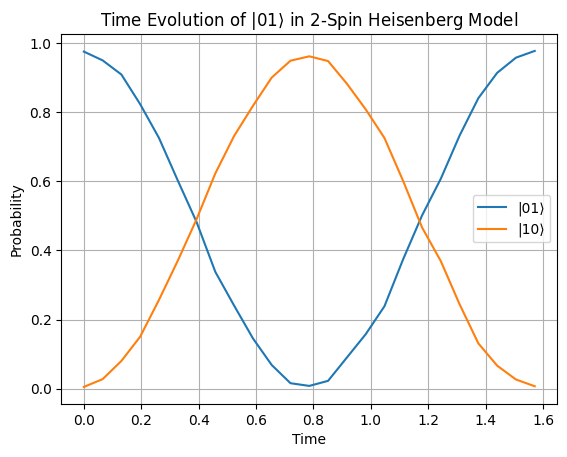

In [ ]:
prob_array_01 = []
prob_array_10 = []

for i in range(len(parametric_values)): # Calculate the probabilities of finding the system in the state |01> or |10> at a specific time 't'
    meas_array= result[i].data.meas.array.flatten()
    counts= Counter(meas_array)
    total= sum(counts.values())
    
    p_1= counts.get(1)/ total
    p_2= counts.get(2)/ total
    
    prob_array_01.append(p_1)
    prob_array_10.append(p_2)

# Plot a graph depicting the time evolution of the |01> state.
plt.plot(parametric_values, prob_array_01, label='|01⟩') 
plt.plot(parametric_values, prob_array_10, label='|10⟩')
plt.xlabel("Time")
plt.ylabel("Probability")
plt.title(r"Time Evolution of $|01\rangle$ in 2-Spin Heisenberg Model")
plt.legend()
plt.grid(True)
plt.show()